In [157]:
import pygad
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [158]:
arr = []
arr2 = []

matriz = [
    [5,2,4,8,9,0,3,3,8,7],
    [5,5,3,4,4,6,4,1,9,1],
    [4,1,2,1,3,8,7,8,9,1],
    [1,7,1,6,9,3,1,9,6,9],
    [4,7,4,9,9,8,6,5,4,2],
    [7,5,8,2,5,2,3,9,8,2],
    [1,4,0,6,8,4,0,1,2,1],
    [1,5,2,1,2,8,3,3,6,2],
    [4,5,9,6,3,9,7,6,5,10],
    [0,6,2,8,7,1,2,1,5,3]
]

In [159]:
def fitness_func(solution, solution_idx):
    x = solution[0]
    y = solution[1]
    z=0
    for i in range(0,10):
        for j in range(0,10):
            z+= math.sqrt((i-x)**2  + (j-y)**2)*matriz[i][j]
    return 1/z

In [160]:

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"-> Generation={ga_instance.generations_completed:3}  ",end=" ")
    print(f"Fitness={ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]:7.2}  ",end=" ")
    print(f"Change={ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness:7.2} ",end=" ")
    best = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[0]
    best = [int(best[0]),int(best[1])]
    print(f"Best Solution:{best}",end=" ")
    print(f"Population:",end=" ")
    for x in ga_instance.population:
        print(f'[{int(x[0])}, {int(x[1])}]',end=" ")
    print("")
    
    global arr 
    arr.append(ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[0])
    global arr2
    arr2.append(ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1])
    
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [176]:
ga_instance = pygad.GA(num_generations=20,
                       num_parents_mating=2,
                       sol_per_pop=4,
                       num_genes=2,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_probability=0.9,
                    #    gene_space={"low": 0, "high": 10},
                       gene_space=[0,1,2,3,4,5,6,7,8,9],
                       mutation_by_replacement=True,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       save_solutions=True)

ga_instance.run()

-> Generation=  1   Fitness=0.00053   Change=-6.1e-05  Best Solution:[6, 6] Population: [7, 3] [8, 3] [0, 1] [6, 6] 
-> Generation=  2   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [9, 7] [8, 8] [0, 0] 
-> Generation=  3   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [8, 0] [8, 1] [1, 7] 
-> Generation=  4   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [7, 8] [2, 3] [7, 2] 
-> Generation=  5   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [1, 3] [9, 5] [1, 0] 
-> Generation=  6   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [6, 1] [4, 8] [2, 0] 
-> Generation=  7   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [8, 9] [8, 4] [2, 7] 
-> Generation=  8   Fitness=0.00053   Change=    0.0  Best Solution:[6, 6] Population: [6, 6] [7, 6] [2, 1] [7, 8] 
-> Generation=  9   Fitness=0.00053   Change=    0.0  Best Solution:[6,

In [162]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Solution", solution)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


Solution [4. 5.]
Fitness value of the best solution = 0.0005932193167867629


In [163]:
arr = ga_instance.solutions
arr2 = ga_instance.solutions_fitness

# print(arr)
x = [x[0]+0.5 for x in arr]
y = [x[1]+0.5 for x in arr]
print(x)



[2.5, 5.5, 2.5, 6.5, 5.5, 8.5, 4.5, 2.5, 2.5, 4.5, 4.5, 4.5, 4.5, 2.5, 4.5, 7.5, 4.5, 0.5, 1.5, 4.5, 4.5, 0.5, 0.5, 8.5, 4.5, 2.5, 7.5, 8.5, 4.5, 4.5, 6.5, 2.5, 4.5, 3.5, 7.5, 7.5, 4.5, 3.5, 0.5, 3.5, 4.5, 0.5, 4.5, 3.5, 4.5, 3.5, 8.5, 7.5, 4.5, 6.5, 4.5, 4.5, 4.5, 0.5, 4.5, 4.5, 4.5, 4.5, 8.5, 4.5, 4.5, 0.5, 4.5, 9.5, 4.5, 6.5, 4.5, 5.5, 4.5, 4.5, 1.5, 4.5, 4.5, 4.5, 8.5, 4.5, 4.5, 2.5, 2.5, 4.5, 4.5, 7.5, 4.5, 4.5]


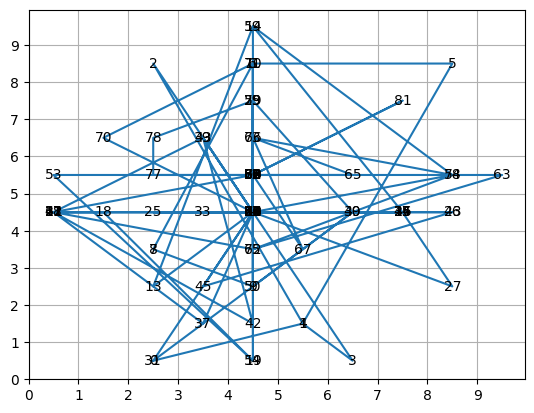

In [164]:
colors= [1-(x/max(arr2)) for x in arr2]
colors2 = [[x]*3 for x in colors]
plt.grid(True)
# plt.scatter(x, y, color=colors2)
plt.plot(x, y)
plt.xticks(range(0,10))
plt.yticks(range(0,10))
for  it, (xi, yi) in enumerate(list(zip(x,y))):
    plt.text(x=xi, y=yi,s=it, ha='center', va='center', color='black',)
plt.show()


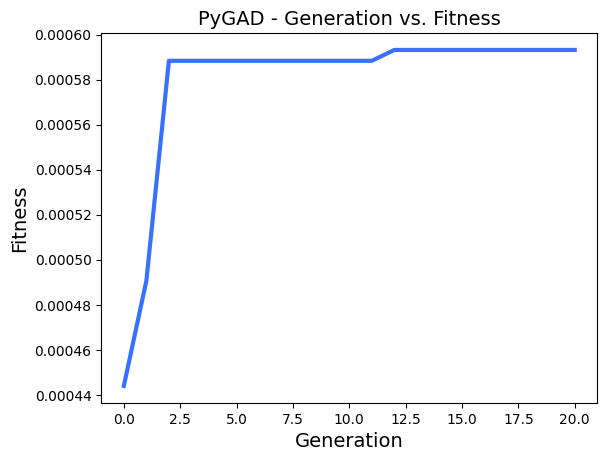

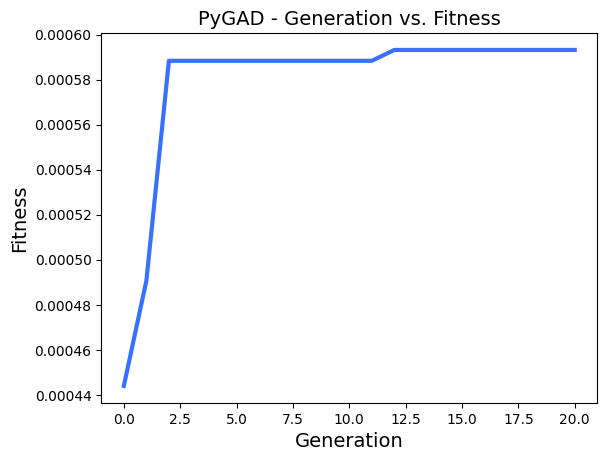

In [165]:
ga_instance.plot_fitness()


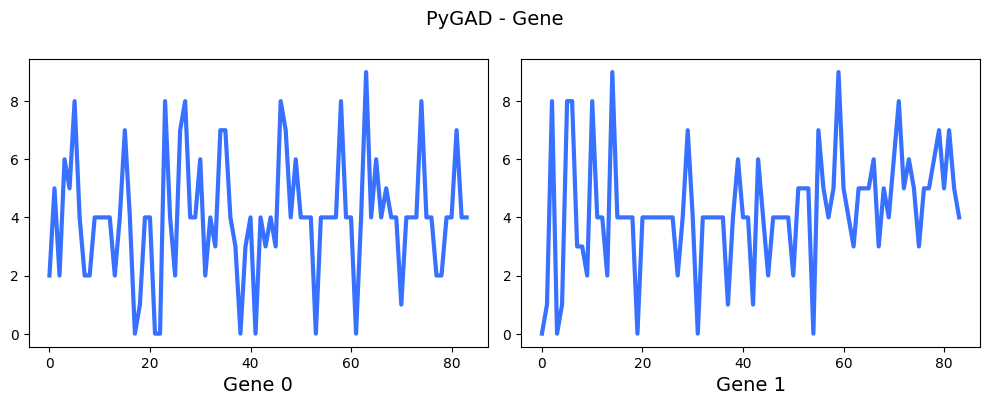

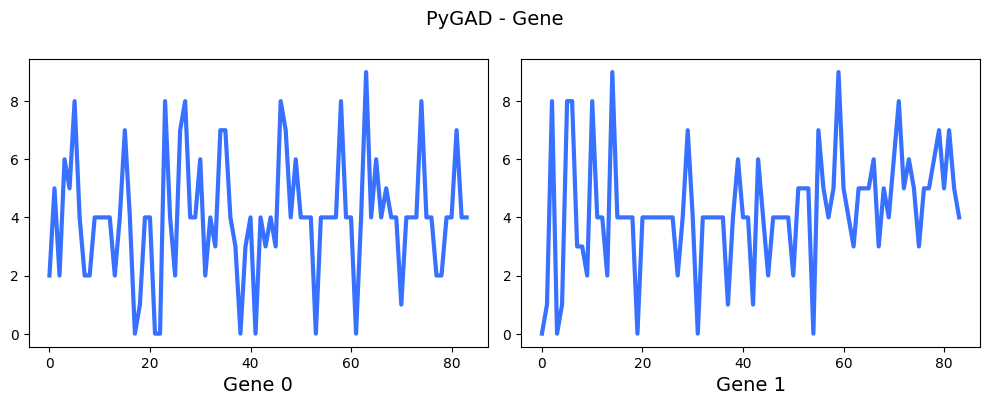

In [166]:
ga_instance.plot_genes()